<img src="../assets/packt-banner.png" alt="">

# Chapter 4: Training Classification Models

We continue where `chapter_3_workbook.ipynb` left off, by loading the processed Human Resource Analytics dataset and getting started on training models to predict the target variable "left" (modeling if an employee has left the company or not).

---

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [2]:
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

2020-02-13 

CPython 3.7.5
IPython 7.10.1

requests 2.22.0
numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.1
seaborn 0.9.0
sklearn 0.21.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


---

## Training classification models   
We train SVMs, random forests and K-nearest neighbors classification models.

---

### Introduction to classification algorithms

---

In [3]:
# Load the processed data

df = pd.read_csv('../data/hr-analytics/hr_data_processed.csv')

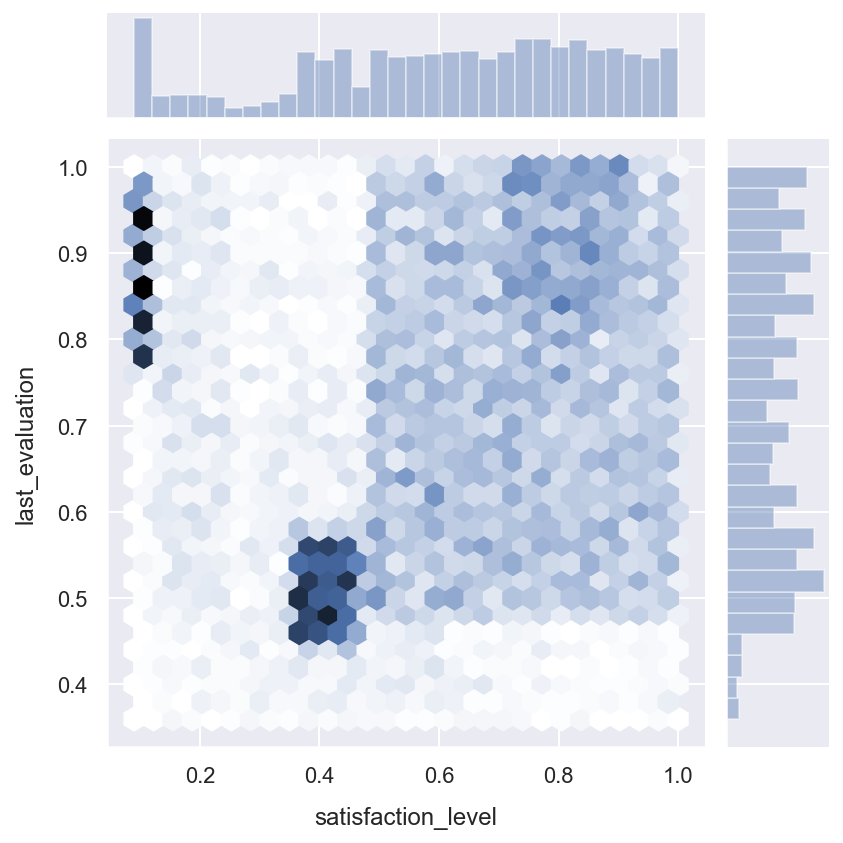

In [4]:
# The two features we'll use for training in this section

sns.jointplot(
    x='satisfaction_level',
    y='last_evaluation',
    data=df,
    kind='hex'
)
plt.savefig(
    '../figures/chapter-4-hr-analytics-jointplot.png',
    bbox_inches='tight',
    dpi=300,
)

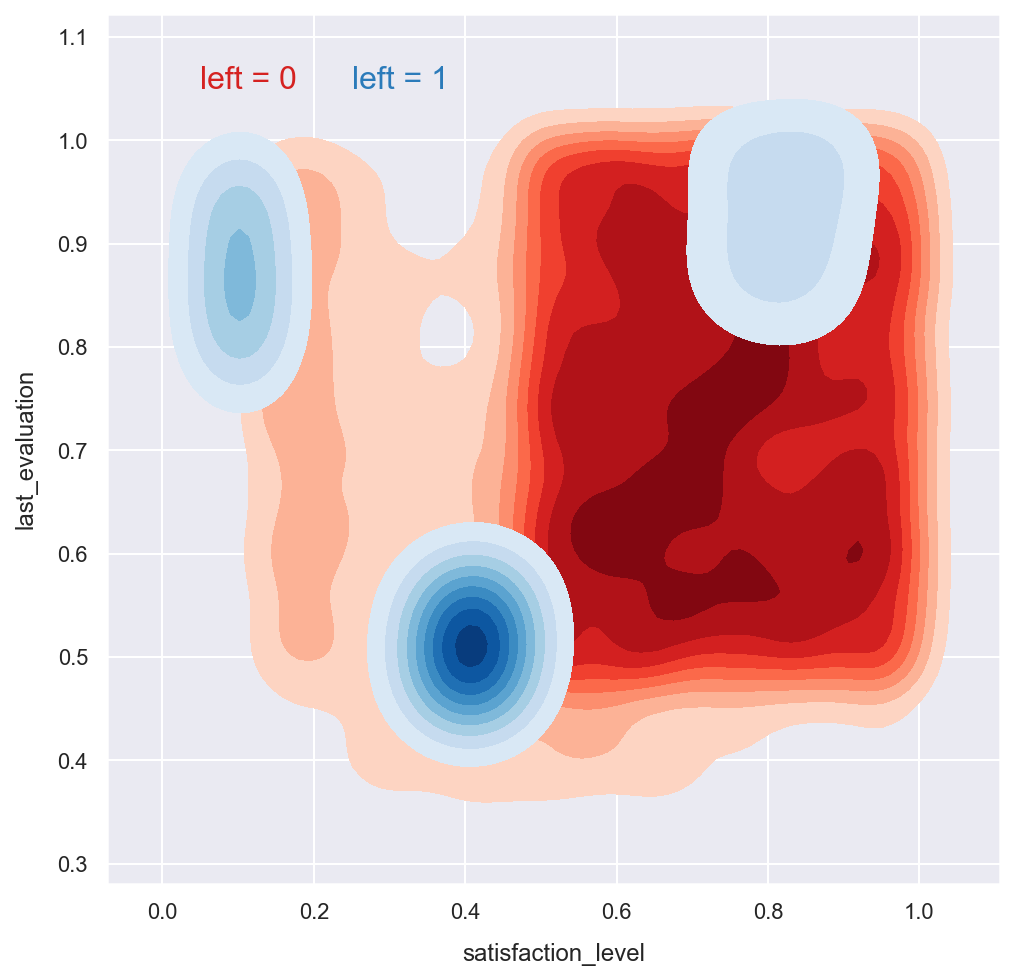

In [5]:
# Segementing by the target variable

fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(
        df.loc[df.left==i, 'satisfaction_level'],
        df.loc[df.left==i, 'last_evaluation'],
        cmap=c,
        **plot_args
    )

ax.text(
    0.05, 1.05, 'left = 0',
    size=16,
    color=sns.color_palette('Reds')[-2]
)
ax.text(
    0.25, 1.05, 'left = 1',
    size=16, color=sns.color_palette('Blues')[-2]
)
plt.savefig(
    '../figures/chapter-4-hr-analytics-bivariate-segmented.png',
    bbox_inches='tight',
    dpi=300,
)

In [6]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values,
    df['left'].values,
    test_size=0.3,
    random_state=1
)

In [7]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

---

### Support Vector Machine (SVM)

---

In [8]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 75.9%


In [10]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3416,    0],
       [1084,    0]])

In [11]:
# What is the accuracy by class?

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


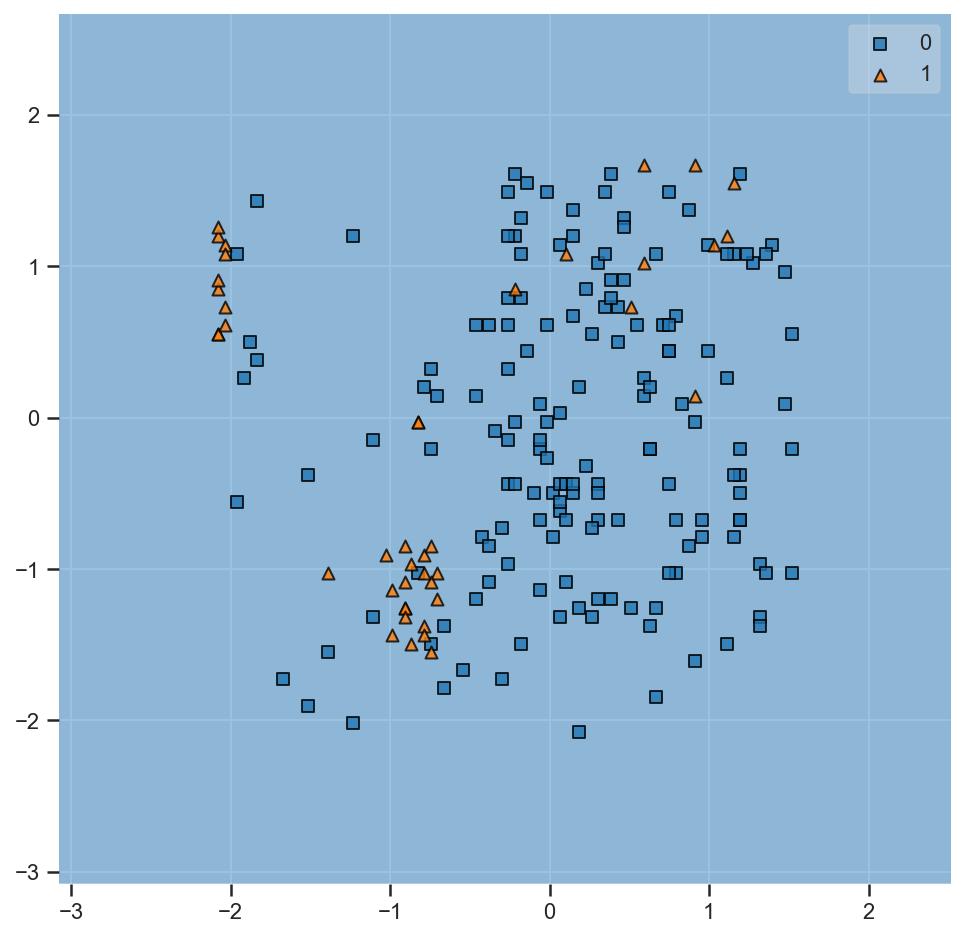

In [12]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions
# Note: If getting ModuleNotFoundError,
# then you can try installing mlxtend with pip.
# Open the terminal and run: "pip install mlxtend"

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm);

In [13]:
# The docstring for scikit-learn's SVM

SVC?

Init signature:
SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.linear_model.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentat

In [14]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples(
        [('predictions', 0), ('predictions', 1)]
    )
    indx = pd.MultiIndex.from_tuples(
        [('actual', 0), ('actual', 1)]
    )
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 89.7%


predictions     
                   0    1
actual 0        3308  108
       1         354  730


percent accuracy score per class:
left = 0 : 96.84%
left = 1 : 67.34%



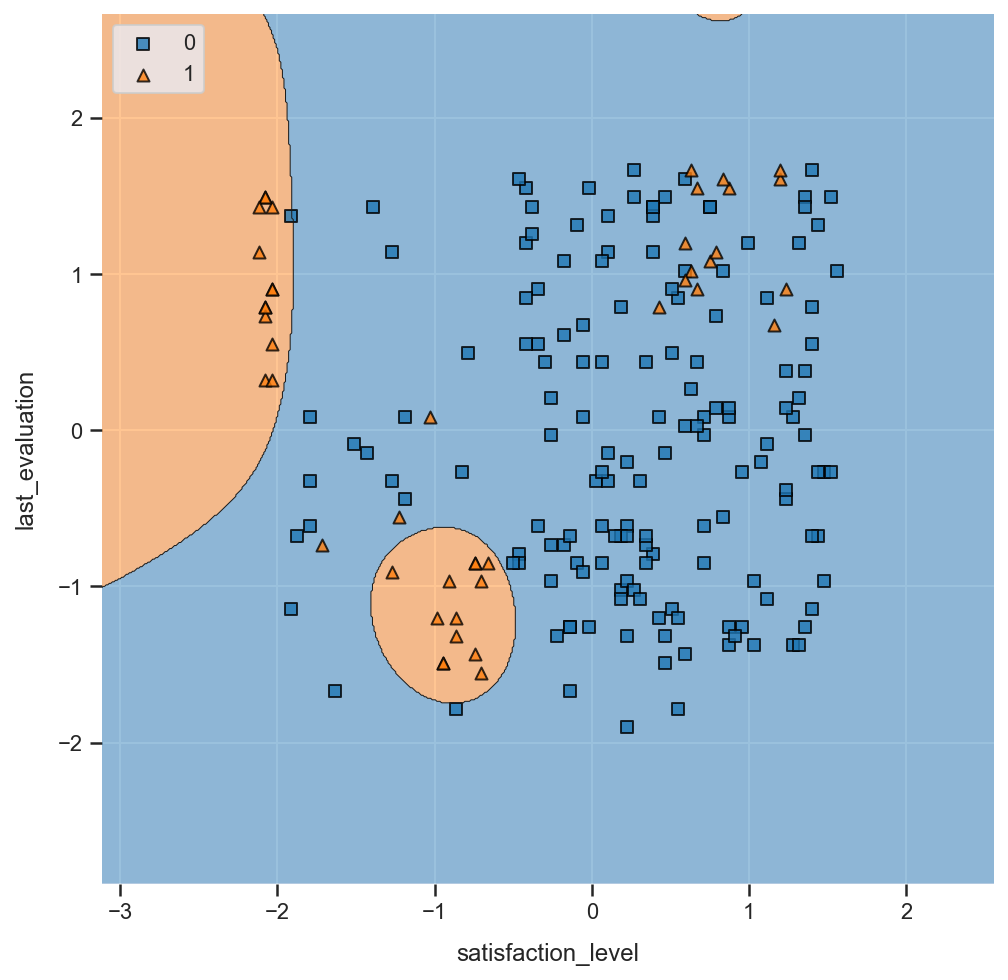

In [16]:
check_model_fit(svm, X_test_std, y_test)
plt.savefig(
    '../figures/chapter-4-hr-analytics-svm.png',
    bbox_inches='tight',
    dpi=300,
)

---

### K-Nearest Neighbors

---

In [17]:
# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : str or callable, optional (default = 'uniform')
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sam

total accuracy = 90.9%


predictions     
                   0    1
actual 0        3203  213
       1         198  886


percent accuracy score per class:
left = 0 : 93.76%
left = 1 : 81.73%



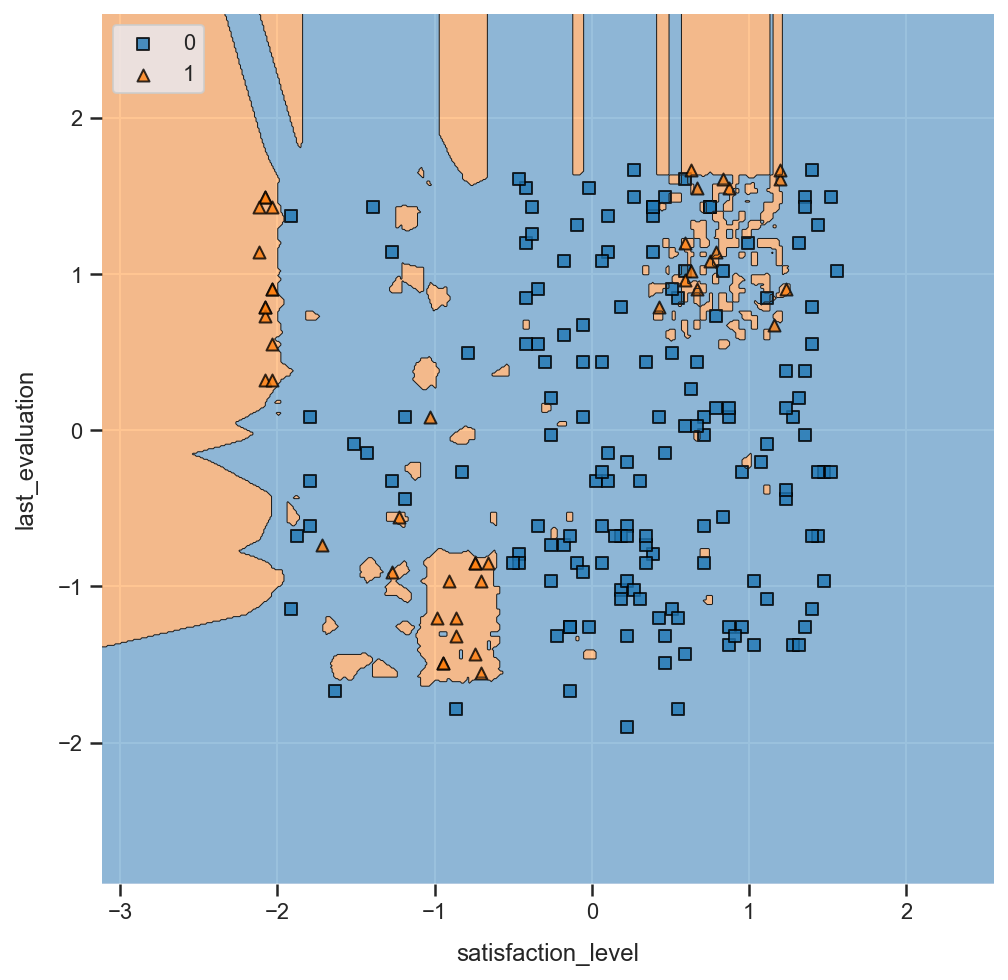

In [18]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig(
    '../figures/chapter-4-hr-analytics-knn-overfit.png',
    bbox_inches='tight',
    dpi=300,
)

total accuracy = 91.6%


predictions     
                   0    1
actual 0        3290  126
       1         254  830


percent accuracy score per class:
left = 0 : 96.31%
left = 1 : 76.57%



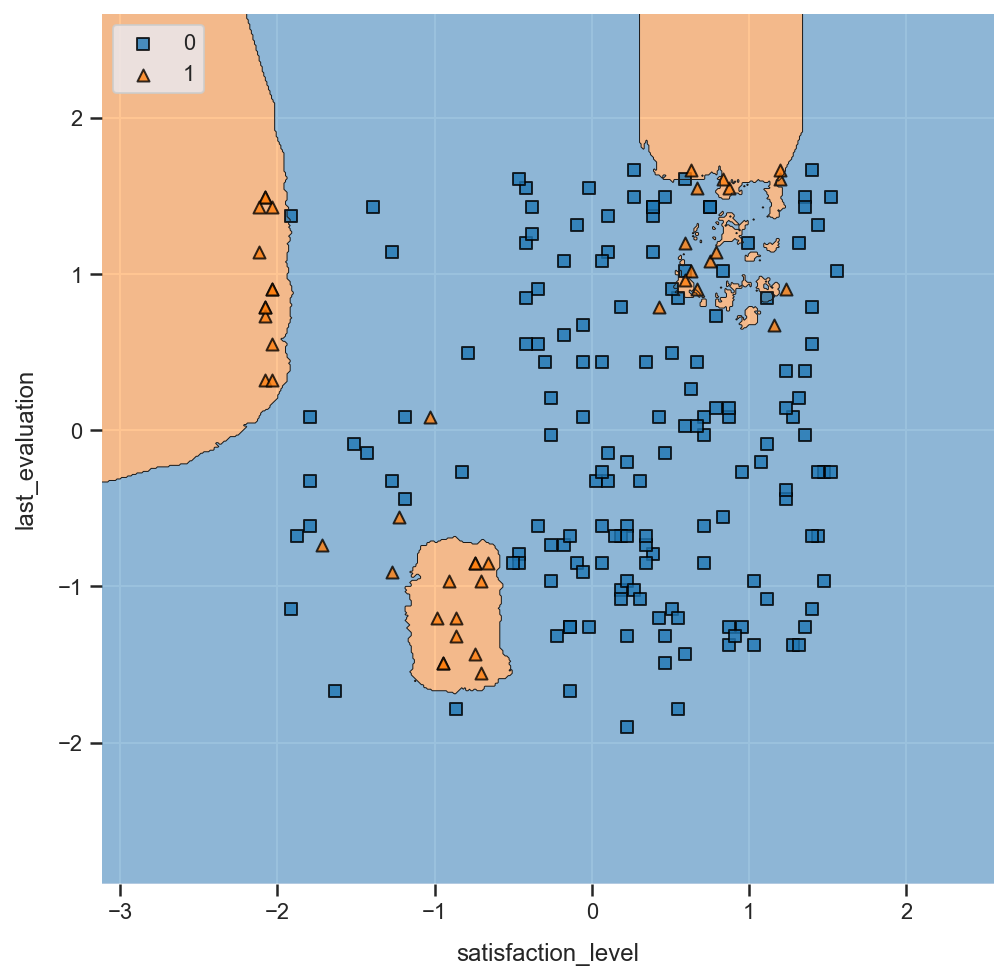

In [19]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig(
    '../figures/chapter-4-hr-analytics-knn.png',
    bbox_inches='tight',
    dpi=300,
)

---

### Random Forest

---

In [20]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

total accuracy = 92.0%


predictions     
                   0    1
actual 0        3371   45
       1         317  767


percent accuracy score per class:
left = 0 : 98.68%
left = 1 : 70.76%



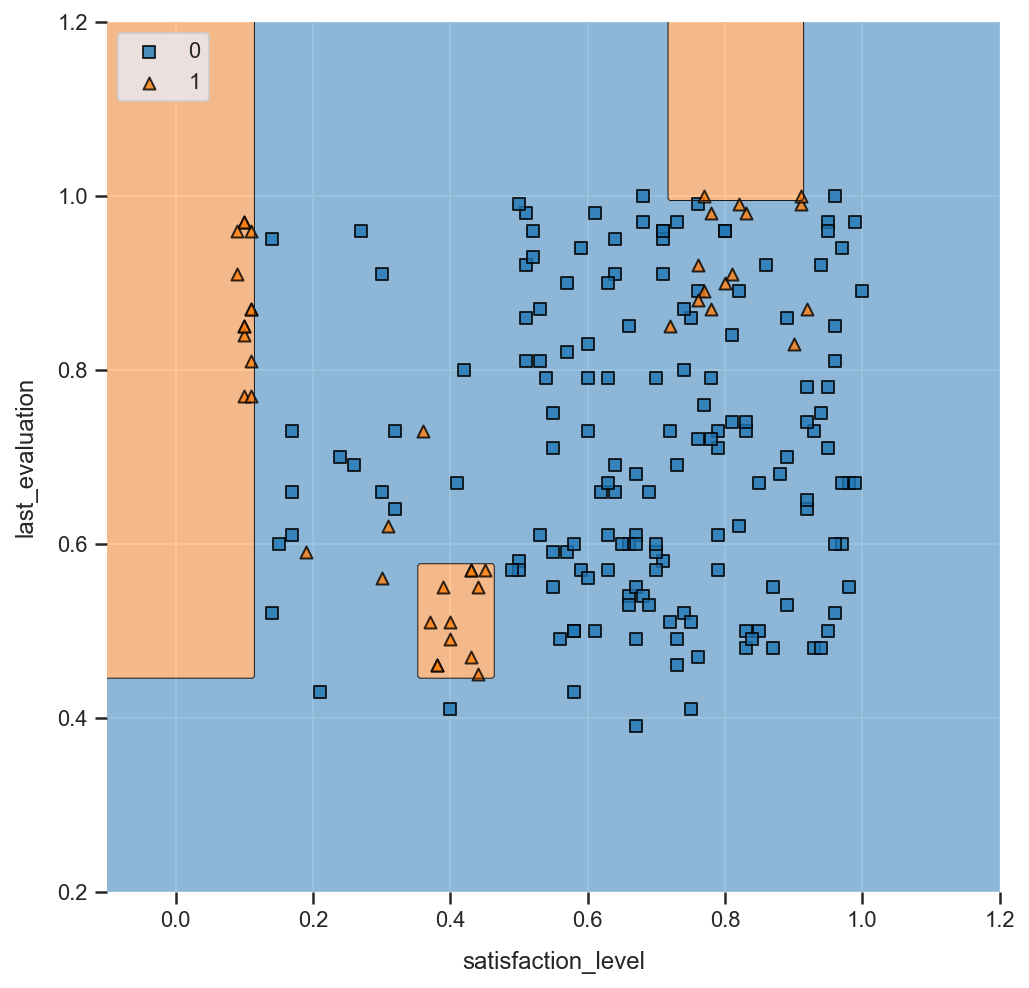

In [21]:
# Train a Random Forest

forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.2)
plt.savefig(
    '../figures/chapter-4-hr-analytics-forest.png',
    bbox_inches='tight',
    dpi=300,
)

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    forest.estimators_[0],
    out_file=None,
    feature_names=features,  
    class_names=['no', 'yes'],  
    filled=True, rounded=True,  
    special_characters=True,
)
graph = graphviz.Source(dot_data)

In [23]:
graph.render(
    filename='../figures/chapter-4-hr-analytics-tree-graph',   
    format='png',
)

'../figures/chapter-4-hr-analytics-tree-graph.png'

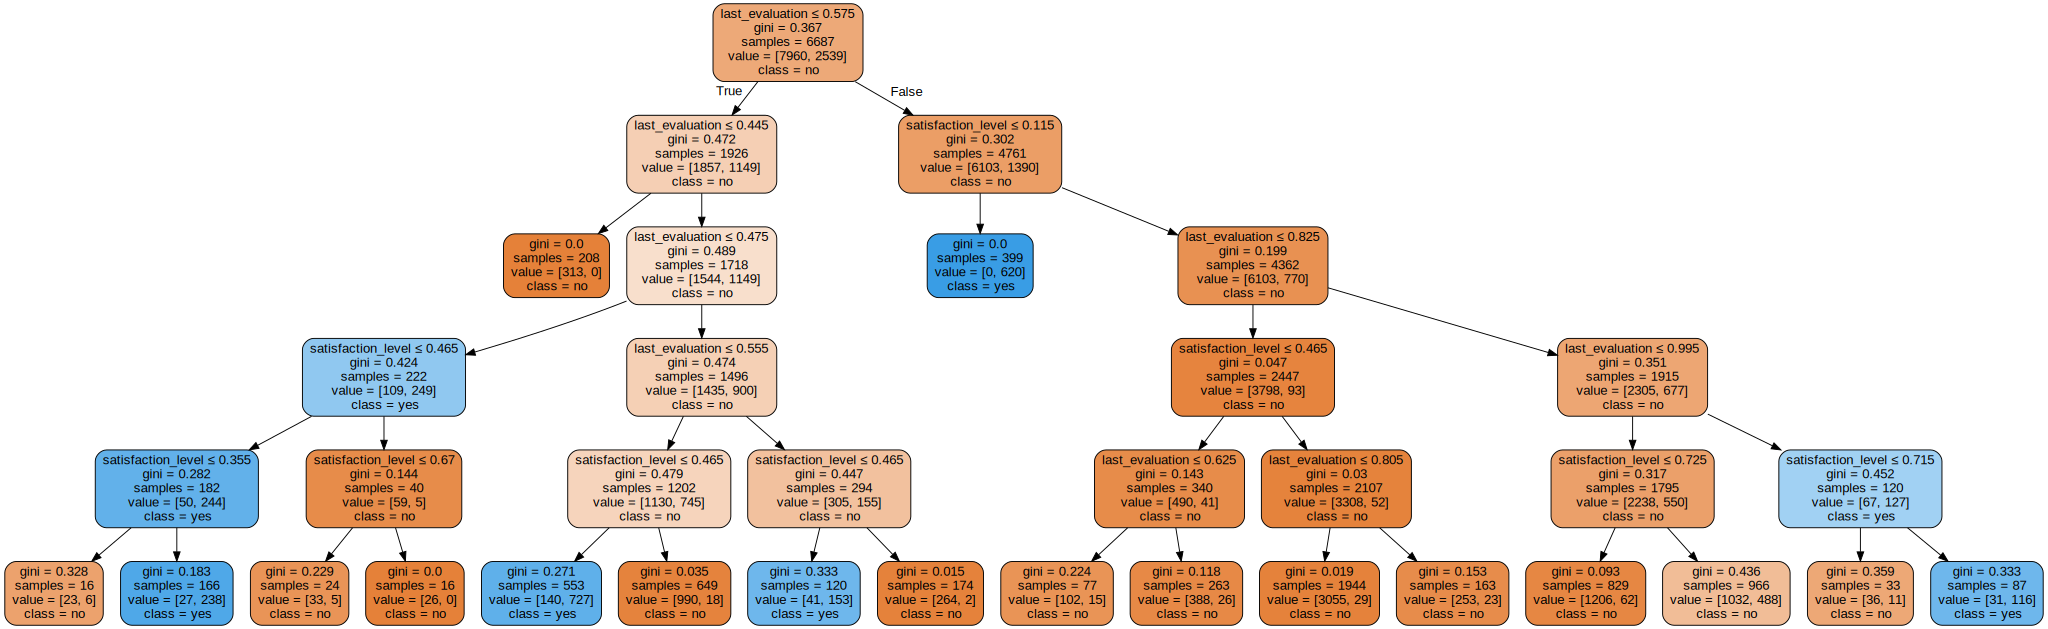

In [24]:
graph

---

### Activity: Training and Visualizing SVM Models with Scikit-learn

_Note: If desired, the following code can be removed from the student version of the notebook and replaced with empty cells._

---

In [25]:
# Re-load the processed data

df = pd.read_csv('../data/hr-analytics/hr_data_processed.csv')

In [26]:
# Describe the features "number_project" and "average_monthly_hours"

df[['number_project', 'average_montly_hours']].describe()

,number_project,average_montly_hours
count,14999.000000,14999.000000
mean,3.803054,200.992489
std,1.232592,49.492423
min,2.000000,96.000000
25%,3.000000,156.000000
50%,4.000000,200.000000
75%,5.000000,244.000000
max,7.000000,310.000000


In [27]:
# Do a train test split on the features "number_project" and "average_monthly_hours"

from sklearn.model_selection import train_test_split

features = ['number_project', 'average_montly_hours']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values,
    df['left'].values,
    test_size=0.3,
    random_state=1,
)

In [28]:
# Scale the data using a MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
(
    X_train_scaled.flatten().mean(),
    X_train_scaled.flatten().min(),
    X_train_scaled.flatten().max()
)

(0.4231614367047082, 0.0, 1.0)

In [30]:
# Train a support vector machine classifier with the rbf kernel

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, random_state=1, gamma='scale')
svm.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_scaled)
accuracy_score(y_test, y_pred) * 100

88.84444444444445

In [32]:
# What is the accuracy by class?

from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, y_pred)
cmat.diagonal() / cmat.sum(axis=1) * 100

array([95.98946136, 66.32841328])

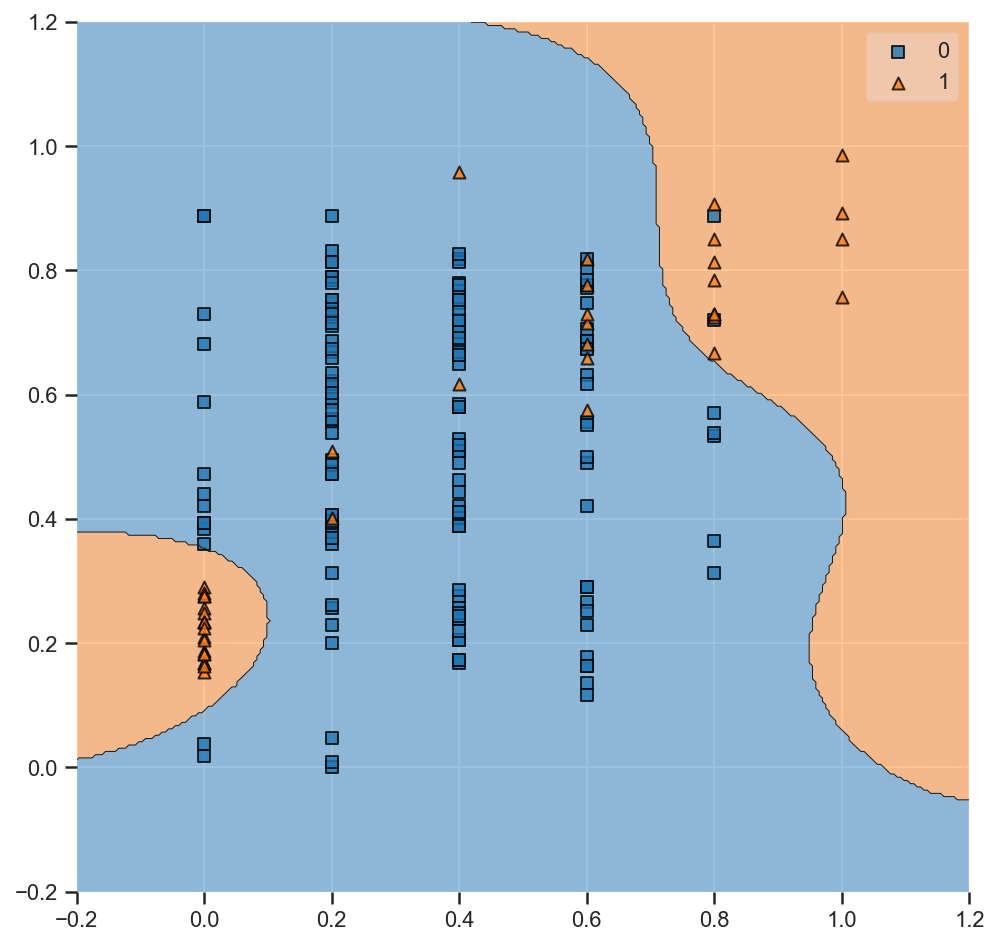

In [33]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions

N_samples = 200
X, y = X_train_scaled[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.savefig(
    '../figures/chapter-4-hr-analytics-num-proj-hours-svm-c-1.png',
    bbox_inches='tight',
    dpi=300,
)

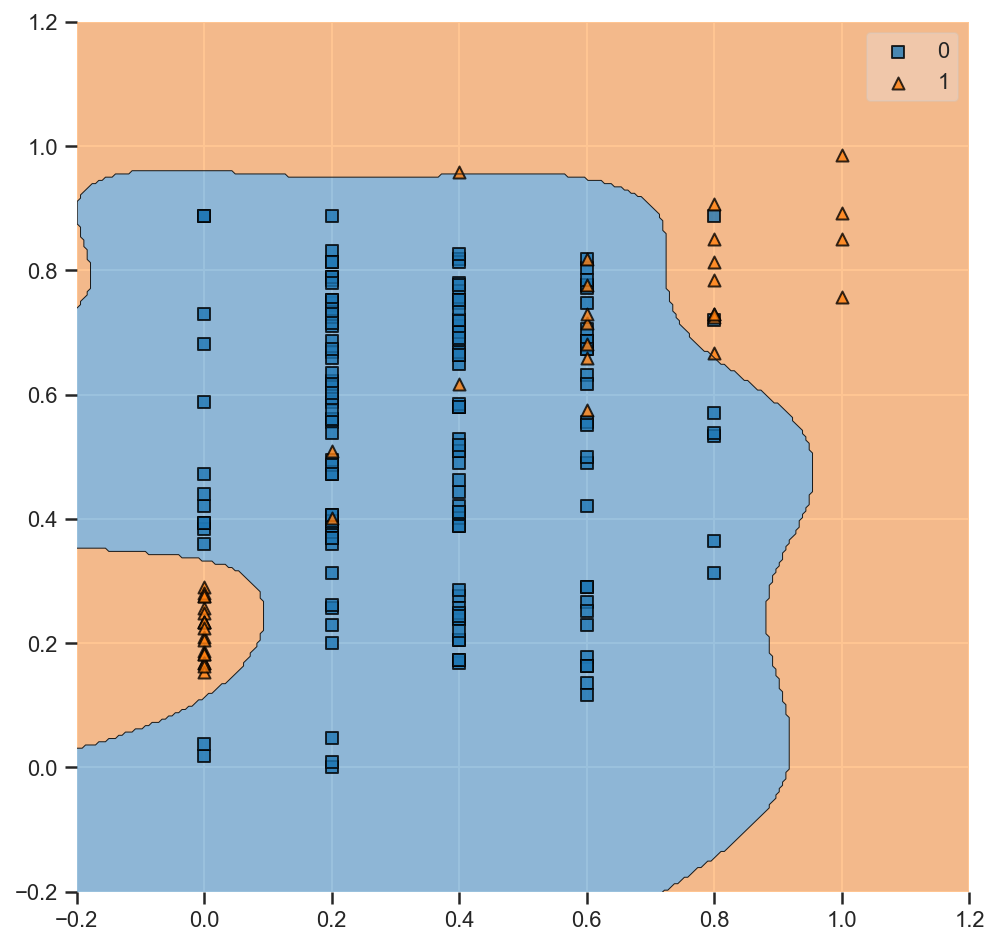

In [34]:
svm = SVC(kernel='rbf', C=50, random_state=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
X, y = X_train_scaled[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.savefig(
    '../figures/chapter-4-hr-analytics-num-proj-hours-svm-c-50.png',
    bbox_inches='tight',
    dpi=300,
)

---